## Data Analysis using Python and Pandas

#### Using the states.csv file from https://covid19india.org that cotains National as well as State-Level Covid Data for India

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

Read the CSV file using Pandas

In [2]:
covid_df = pd.read_csv('./Data/states.csv')

Data from the file is parsed and stored in a 'Data Frame' object, which is one of the core structures in Pandas for storing and working with Tabular data

In [3]:
type(covid_df)

pandas.core.frame.DataFrame

In [4]:
# Display the Data
covid_df

,Date,State,Confirmed,Recovered,Deceased,Other,Tested
0,2020-01-30,Kerala,1,0,0,0,NaN
1,2020-01-30,India,1,0,0,0,NaN
2,2020-02-02,Kerala,2,0,0,0,NaN
3,2020-02-02,India,2,0,0,0,NaN
4,2020-02-03,Kerala,3,0,0,0,NaN
...,...,...,...,...,...,...,...
10630,2021-01-05,Tripura,33281,32803,382,23,585181.0
10631,2021-01-05,India,10375478,9996501,150151,4269,176532297.0
10632,2021-01-05,Uttar Pradesh,589611,568892,8433,0,24594871.0
10633,2021-01-05,Uttarakhand,92366,85883,1544,1222,1842877.0


Here's what we can say about the data as of now:
    - The file provides 4 main metrics for Covid19 in India and respective States
    - The metrics are: Confirmed, Recovered, Deceased and Tested
    - Data provied contains 10635 rows, starting from 30th January 2020 up to 5th January 2021
    
NOTE: These are official numbers. Actual numbers may vary based on whether cases were accurately diagnosed / reported

View basic information about the Data Frame

In [5]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10635 entries, 0 to 10634
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10635 non-null  object 
 1   State      10635 non-null  object 
 2   Confirmed  10635 non-null  int64  
 3   Recovered  10635 non-null  int64  
 4   Deceased   10635 non-null  int64  
 5   Other      10635 non-null  int64  
 6   Tested     9907 non-null   float64
dtypes: float64(1), int64(4), object(2)
memory usage: 581.7+ KB


Notice that each column contains values of a specific type. Statistical information can be viewed for numerical columns (mean, standard deviation, min / max values) using the 'Describe' method

In [6]:
covid_df.describe()

,Confirmed,Recovered,Deceased,Other,Tested
count,1.063500e+04,1.063500e+04,10635.000000,10635.000000,9.907000e+03
mean,2.136106e+05,1.881886e+05,3371.739915,45.979690,3.340063e+06
std,9.181888e+05,8.405555e+05,14286.383858,241.187968,1.367680e+07
min,0.000000e+00,0.000000e+00,0.000000,-1.000000,5.800000e+01
25%,8.670000e+02,2.820000e+02,3.000000,0.000000,5.053850e+04
50%,1.033700e+04,6.912000e+03,119.000000,0.000000,2.935910e+05
75%,1.180220e+05,9.875000e+04,1311.500000,0.000000,2.507227e+06
max,1.037548e+07,9.996501e+06,150151.000000,4269.000000,1.765323e+08


NOTE: Some of those numbers look strange. Why is that so?
If there is even one column in our data that has 'float' type values, then the describe method shows all numerical values as floats, even though we have 4 columns in our data that are 'int'. In Python, an 'int' variable can store more data than a 'float' and so converting a large int value to float results in a loss of information. Therefore, when we use the 'describe' method on this data, the columns that have large int values (Confirmed, Recovered, Tested) are converted to floats and represented this way. We will try and see if we can resolve this a bit later in this exercise.


The 'columns' property gives us a list of all columns in the data frame

In [7]:
covid_df.columns

Index(['Date', 'State', 'Confirmed', 'Recovered', 'Deceased', 'Other',
       'Tested'],
      dtype='object')

The 'shape' property gives us the number of rows and columns in the data frame

In [8]:
covid_df.shape

(10635, 7)

Here's a summary of what we have learnt in the above section:

    - pd.read_csv(): read data from a csv into a data frame object
    - .info(): view basic information about rows, columns and data types
    - .describe(): view stastical information for numerical columns
    - .columns: shows a list of all columns in the data frame
    - .shape: shows the number of rows and columns in the data frame

### Retrieving Data from a Data Frame

We are now interested in retrieving data from our data frame. To do this, it might help to understand how data is internally represented in a data frame. A data frame is a dictionary of lists (and not a list of dictionaries). The keys are the column names and values are lists/arrays containing data for the respective columns.

In [9]:
# Pandas data frames are similar to this:
covid_data_dict = {
    
    'date': ['2020-08-30', '2020-08-31', '2020-09-01'],
    'confirmed': [2000, 3000, 4000],
    'recovered': [2400, 3200, 2000],
    'deceased': [100, 93, 101],
    'tested': [10000, 10345, 12000]
}

In [10]:
# Pandas data frames are NOT as follows:
covid_data_list = [
    
    {'date': '2020-08-30', 'confirmed': 2000, 'recovered': 2400, 'deceased': 100, 'tested': 10000},
    {'date': '2020-08-31', 'confirmed': 3000, 'recovered': 3200, 'deceased': 93, 'tested': 10345},
    {'date': '2020-09-01', 'confirmed': 4000, 'recovered': 2000, 'deceased': 101, 'tested': 12000}
]

With this understanding, we can guess how to retrieve data from a data frame. We can get a list of specific values from a column using the index [ ] notation

In [11]:
covid_data_dict['recovered']

[2400, 3200, 2000]

Let's retrieve data from our main data frame

In [12]:
covid_df['Recovered']

0              0
1              0
2              0
3              0
4              0
          ...   
10630      32803
10631    9996501
10632     568892
10633      85883
10634     537250
Name: Recovered, Length: 10635, dtype: int64

Each column in the data frame is represented as a 'series', which basically is a numpy array that has additional methods and properties

In [13]:
type(covid_df['Recovered'])

pandas.core.series.Series

Let's look at how we can rename the columns of our data frame

In [14]:
covid_df.columns = ['date', 'state', 'total_confirmed', 'total_recovered', 'total_deceased', 'other', 'tested']

To view the first 5 records of the data frame, we can use the 'head' method. This also helps us verify that the column renaming was successful

In [15]:
covid_df.head()

,date,state,total_confirmed,total_recovered,total_deceased,other,tested
0,2020-01-30,Kerala,1,0,0,0,NaN
1,2020-01-30,India,1,0,0,0,NaN
2,2020-02-02,Kerala,2,0,0,0,NaN
3,2020-02-02,India,2,0,0,0,NaN
4,2020-02-03,Kerala,3,0,0,0,NaN


We had learnt above that a column in the data frame is basically a numpy array with additional methods and properties. Like arrays, we can retrieve a specific value in the series using the index [ ] notation

In [16]:
covid_df['total_recovered'][6000]

13186

Pandas also provies the 'at' method to retrieve a value from a row and column directly

In [17]:
covid_df.at[6000, 'total_recovered']

13186

Apart from the index notation, Pandas also allows accessing columns using '.' notation. However, this property works only when the column name does not have spaces or special characters

In [18]:
covid_df.total_recovered

0              0
1              0
2              0
3              0
4              0
          ...   
10630      32803
10631    9996501
10632     568892
10633      85883
10634     537250
Name: total_recovered, Length: 10635, dtype: int64

Also, we can pass a list of columns with the index [ ] notation to access a subset of the dataframe

In [19]:
rec_cases_df = covid_df[['date', 'total_recovered']]
rec_cases_df

,date,total_recovered
0,2020-01-30,0
1,2020-01-30,0
2,2020-02-02,0
3,2020-02-02,0
4,2020-02-03,0
...,...,...
10630,2021-01-05,32803
10631,2021-01-05,9996501
10632,2021-01-05,568892
10633,2021-01-05,85883


The new data frame 'rec_cases_df' is simply a 'snapshot' of the original data frame covid_df. Both data frames point to the same location in computer memory which effectively means that changing values in one date frame will affect the other data frame as well. This sharing of data between data frames makes data manipulation really fast in Pandas.

Sometimes though we may need to make a copy of the data frame, which can be done using the 'copy()' method

In [20]:
covid_df_copy = covid_df.copy()

In this case, the covid_df_copy data frame is separate from covid_df, and so changing values in the copy will not affect the original data frame

To access a specific row in the data frame, Pandas provides the 'loc' method

In [21]:
covid_df.loc[6000]

date               2020-08-30
state                     Goa
total_confirmed         17004
total_recovered         13186
total_deceased            183
other                       0
tested                 197216
Name: 6000, dtype: object

We had earlier seen the 'head()' method that gives us the first 5 rows from the data frame. We can pass in a number as an argument to the method to view that many rows

In [22]:
covid_df.head(20)

,date,state,total_confirmed,total_recovered,total_deceased,other,tested
0,2020-01-30,Kerala,1,0,0,0,NaN
1,2020-01-30,India,1,0,0,0,NaN
2,2020-02-02,Kerala,2,0,0,0,NaN
3,2020-02-02,India,2,0,0,0,NaN
4,2020-02-03,Kerala,3,0,0,0,NaN
5,2020-02-03,India,3,0,0,0,NaN
6,2020-02-14,Kerala,3,3,0,0,NaN
7,2020-02-14,India,3,3,0,0,NaN
8,2020-02-20,Kerala,3,3,0,0,NaN
9,2020-02-20,Punjab,0,0,0,0,3675493.0


The 'tail' method shows us the last 5 rows. We can pass a number argument to this method as well to view that many last rows

In [23]:
covid_df.tail()

,date,state,total_confirmed,total_recovered,total_deceased,other,tested
10630,2021-01-05,Tripura,33281,32803,382,23,585181.0
10631,2021-01-05,India,10375478,9996501,150151,4269,176532297.0
10632,2021-01-05,Uttar Pradesh,589611,568892,8433,0,24594871.0
10633,2021-01-05,Uttarakhand,92366,85883,1544,1222,1842877.0
10634,2021-01-05,West Bengal,556384,537250,9841,0,7266038.0


In [24]:
covid_df.tail(10)

,date,state,total_confirmed,total_recovered,total_deceased,other,tested
10625,2021-01-05,Puducherry,38300,37292,635,0,502458.0
10626,2021-01-05,Rajasthan,310675,300126,2719,0,5358544.0
10627,2021-01-05,Sikkim,5938,5221,129,95,69556.0
10628,2021-01-05,Telangana,287993,281400,1554,0,7061049.0
10629,2021-01-05,Tamil Nadu,822370,802385,12177,0,14502929.0
10630,2021-01-05,Tripura,33281,32803,382,23,585181.0
10631,2021-01-05,India,10375478,9996501,150151,4269,176532297.0
10632,2021-01-05,Uttar Pradesh,589611,568892,8433,0,24594871.0
10633,2021-01-05,Uttarakhand,92366,85883,1544,1222,1842877.0
10634,2021-01-05,West Bengal,556384,537250,9841,0,7266038.0


We can use the 'sample' method to retrieve a random sample of rows

In [25]:
covid_df.sample(10)

,date,state,total_confirmed,total_recovered,total_deceased,other,tested
2118,2020-05-16,Chandigarh,191,51,3,0,2718.0
517,2020-03-30,Odisha,3,0,0,0,NaN
10628,2021-01-05,Telangana,287993,281400,1554,0,7061049.0
4986,2020-08-02,Assam,42905,32385,105,3,964499.0
3637,2020-06-26,Gujarat,30158,22038,1772,0,351179.0
4292,2020-07-13,West Bengal,31448,19213,956,0,627438.0
6711,2020-09-19,Andaman and Nicobar Islands,3644,3436,52,0,50681.0
4502,2020-07-19,Odisha,17437,12453,119,0,386102.0
2389,2020-05-23,Manipur,29,2,0,0,4094.0
9349,2020-12-01,Gujarat,211257,192468,4004,0,7894467.0


Here's a summary of what we learnt in the above section:
    - covid_df['daily_recovered']: retrieving columns as a series using the column name
    - daily_recovered[6000]: retrieving values from a series using an index
    - covid_df.at[6000, 'daily_recovered]: retrieving a single value from the data frame
    - covid_df.copy(): create a deep copy of the data frame
    - covid_df.loc[6000]: retrieving a row or range of rows from the data frame
    - head, tail and sample: methods used to retrieve several rows from the data frame

### Analyzing Data from a Data Frame

We now begin asking questions about our data.

Our data frame contains India + States data, resulting in 10635 rows. To keep things simple, we can choose to work with a subset of the data and perform analysis for a specific State. For this exercise, we will extract and work with India-level data

Create a new dataframe for India by querying the data and extracting all rows where 'state' is 'India'

In [26]:
covid_ind_df = covid_df[covid_df['state'] == 'India']

View the extracted data

In [27]:
covid_ind_df

,date,state,total_confirmed,total_recovered,total_deceased,other,tested
1,2020-01-30,India,1,0,0,0,NaN
3,2020-02-02,India,2,0,0,0,NaN
5,2020-02-03,India,3,0,0,0,NaN
7,2020-02-14,India,3,3,0,0,NaN
10,2020-02-20,India,3,3,0,0,NaN
...,...,...,...,...,...,...,...
10487,2021-01-01,India,10306469,9905570,149255,4217,173941958.0
10523,2021-01-02,India,10324613,9926473,149471,4233,174900083.0
10559,2021-01-03,India,10341291,9946131,149686,4246,175636061.0
10595,2021-01-04,India,10357569,9975340,149886,4255,176532297.0


In [28]:
covid_ind_df.shape

(315, 7)

So we now have 315 rows of data to work with instead of 10635.
Before proceeding with the analysis, we need to decide if we want to continue working with the data that has been provided or if we need new information / features. The data already gives us the 'total' count of confirmed, recovered and deceased cases. It would be a good idea to have a 'daily' count for these columns. We will start by creating three new columns that will store this information

In [29]:
covid_ind_df['daily_confirmed'] = 0
covid_ind_df['daily_recovered'] = 0
covid_ind_df['daily_deceased'] = 0

covid_ind_df.head()

,date,state,total_confirmed,total_recovered,total_deceased,other,tested,daily_confirmed,daily_recovered,daily_deceased
1,2020-01-30,India,1,0,0,0,NaN,0,0,0
3,2020-02-02,India,2,0,0,0,NaN,0,0,0
5,2020-02-03,India,3,0,0,0,NaN,0,0,0
7,2020-02-14,India,3,3,0,0,NaN,0,0,0
10,2020-02-20,India,3,3,0,0,NaN,0,0,0


In [30]:
covid_ind_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 315 entries, 1 to 10631
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             315 non-null    object 
 1   state            315 non-null    object 
 2   total_confirmed  315 non-null    int64  
 3   total_recovered  315 non-null    int64  
 4   total_deceased   315 non-null    int64  
 5   other            315 non-null    int64  
 6   tested           299 non-null    float64
 7   daily_confirmed  315 non-null    int64  
 8   daily_recovered  315 non-null    int64  
 9   daily_deceased   315 non-null    int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 27.1+ KB


The three new columns are of the 'int' type and have been initialized with 0 for all rows. We will need to compute values for these columns. Let's start with the daily_confirmed

In [31]:
covid_ind_df['daily_confirmed'] = covid_ind_df['total_confirmed'] - covid_ind_df['total_confirmed'].shift(1)
covid_ind_df['daily_confirmed']

1            NaN
3            1.0
5            1.0
7            0.0
10           0.0
          ...   
10487    20159.0
10523    18144.0
10559    16678.0
10595    16278.0
10631    17909.0
Name: daily_confirmed, Length: 315, dtype: float64

What did we just do? We took value of the 'total_confirmed' from each row and subtracted it from the value of the previous row (using the 'shift' method of python). This gives us the daily increase / decrease value for confirmed cases, which is then stored in the 'daily_confirmed' column for each row. Let's compute values for 'daily_recovered' and 'daily_deceased'

In [32]:
covid_ind_df['daily_recovered'] = covid_ind_df['total_recovered'] - covid_ind_df['total_recovered'].shift(1)
covid_ind_df['daily_deceased'] = covid_ind_df['total_deceased'] - covid_ind_df['total_deceased'].shift(1)

In [33]:
covid_ind_df['daily_recovered']

1            NaN
3            0.0
5            0.0
7            3.0
10           0.0
          ...   
10487    23838.0
10523    20903.0
10559    19658.0
10595    29209.0
10631    21161.0
Name: daily_recovered, Length: 315, dtype: float64

In [34]:
covid_ind_df['daily_deceased']

1          NaN
3          0.0
5          0.0
7          0.0
10         0.0
         ...  
10487    237.0
10523    216.0
10559    215.0
10595    200.0
10631    265.0
Name: daily_deceased, Length: 315, dtype: float64

This is how our data frame looks now

In [35]:
covid_ind_df.head(10)

,date,state,total_confirmed,total_recovered,total_deceased,other,tested,daily_confirmed,daily_recovered,daily_deceased
1,2020-01-30,India,1,0,0,0,NaN,NaN,NaN,NaN
3,2020-02-02,India,2,0,0,0,NaN,1.0,0.0,0.0
5,2020-02-03,India,3,0,0,0,NaN,1.0,0.0,0.0
7,2020-02-14,India,3,3,0,0,NaN,0.0,3.0,0.0
10,2020-02-20,India,3,3,0,0,NaN,0.0,0.0,0.0
15,2020-03-02,India,5,3,0,0,NaN,2.0,0.0,0.0
21,2020-03-03,India,6,3,0,0,NaN,1.0,0.0,0.0
28,2020-03-04,India,28,3,0,0,NaN,22.0,0.0,0.0
36,2020-03-05,India,30,3,0,0,NaN,2.0,0.0,0.0
44,2020-03-06,India,31,3,0,0,NaN,1.0,0.0,0.0


Great. Let's create another new column that will store the number of 'active' cases (remember we are creating all these columns for India-level data)

In [36]:
covid_ind_df['active'] = covid_ind_df['total_confirmed'] - (covid_ind_df['total_recovered'] + covid_ind_df['total_deceased']
                                                           + covid_ind_df['other'])
covid_ind_df['active']

1             1
3             2
5             3
7             0
10            0
          ...  
10487    247427
10523    244436
10559    241228
10595    228088
10631    224557
Name: active, Length: 315, dtype: int64

In [37]:
covid_ind_df.head(10)

,date,state,total_confirmed,total_recovered,total_deceased,other,tested,daily_confirmed,daily_recovered,daily_deceased,active
1,2020-01-30,India,1,0,0,0,NaN,NaN,NaN,NaN,1
3,2020-02-02,India,2,0,0,0,NaN,1.0,0.0,0.0,2
5,2020-02-03,India,3,0,0,0,NaN,1.0,0.0,0.0,3
7,2020-02-14,India,3,3,0,0,NaN,0.0,3.0,0.0,0
10,2020-02-20,India,3,3,0,0,NaN,0.0,0.0,0.0,0
15,2020-03-02,India,5,3,0,0,NaN,2.0,0.0,0.0,2
21,2020-03-03,India,6,3,0,0,NaN,1.0,0.0,0.0,3
28,2020-03-04,India,28,3,0,0,NaN,22.0,0.0,0.0,25
36,2020-03-05,India,30,3,0,0,NaN,2.0,0.0,0.0,27
44,2020-03-06,India,31,3,0,0,NaN,1.0,0.0,0.0,28


We do not need the 'other' column anymore so we can remove it from the data frame using the 'drop' method

In [38]:
covid_ind_df = covid_ind_df.drop(['other'], axis = 1)
covid_ind_df.head()

,date,state,total_confirmed,total_recovered,total_deceased,tested,daily_confirmed,daily_recovered,daily_deceased,active
1,2020-01-30,India,1,0,0,NaN,NaN,NaN,NaN,1
3,2020-02-02,India,2,0,0,NaN,1.0,0.0,0.0,2
5,2020-02-03,India,3,0,0,NaN,1.0,0.0,0.0,3
7,2020-02-14,India,3,3,0,NaN,0.0,3.0,0.0,0
10,2020-02-20,India,3,3,0,NaN,0.0,0.0,0.0,0


The axis = 1 indicates that we are dropping a column

The first step (usually) in data analysis is to check if we have any null / missing values in our data frame. We can use the 'isnull().sum()' expression for this

In [39]:
covid_ind_df.isnull().sum()

date                0
state               0
total_confirmed     0
total_recovered     0
total_deceased      0
tested             16
daily_confirmed     1
daily_recovered     1
daily_deceased      1
active              0
dtype: int64

We have 16 null values in the 'tested' column and 1 each in three new columns we had created earlier

Pandas provides the 'isna()' method to retrieve rows that have null values from a specified column

In [40]:
covid_ind_df[covid_ind_df['tested'].isna()]

,date,state,total_confirmed,total_recovered,total_deceased,tested,daily_confirmed,daily_recovered,daily_deceased,active
1,2020-01-30,India,1,0,0,NaN,NaN,NaN,NaN,1
3,2020-02-02,India,2,0,0,NaN,1.0,0.0,0.0,2
5,2020-02-03,India,3,0,0,NaN,1.0,0.0,0.0,3
7,2020-02-14,India,3,3,0,NaN,0.0,3.0,0.0,0
10,2020-02-20,India,3,3,0,NaN,0.0,0.0,0.0,0
15,2020-03-02,India,5,3,0,NaN,2.0,0.0,0.0,2
21,2020-03-03,India,6,3,0,NaN,1.0,0.0,0.0,3
28,2020-03-04,India,28,3,0,NaN,22.0,0.0,0.0,25
36,2020-03-05,India,30,3,0,NaN,2.0,0.0,0.0,27
44,2020-03-06,India,31,3,0,NaN,1.0,0.0,0.0,28


View the first 20 rows 

In [41]:
covid_ind_df.head(20)

,date,state,total_confirmed,total_recovered,total_deceased,tested,daily_confirmed,daily_recovered,daily_deceased,active
1,2020-01-30,India,1,0,0,NaN,NaN,NaN,NaN,1
3,2020-02-02,India,2,0,0,NaN,1.0,0.0,0.0,2
5,2020-02-03,India,3,0,0,NaN,1.0,0.0,0.0,3
7,2020-02-14,India,3,3,0,NaN,0.0,3.0,0.0,0
10,2020-02-20,India,3,3,0,NaN,0.0,0.0,0.0,0
15,2020-03-02,India,5,3,0,NaN,2.0,0.0,0.0,2
21,2020-03-03,India,6,3,0,NaN,1.0,0.0,0.0,3
28,2020-03-04,India,28,3,0,NaN,22.0,0.0,0.0,25
36,2020-03-05,India,30,3,0,NaN,2.0,0.0,0.0,27
44,2020-03-06,India,31,3,0,NaN,1.0,0.0,0.0,28


It looks like the first 16 rows of our data frame has 'NaN' in the 'tested' column. Missing or null values have to be effectively handled as their presence leads to incorrect analysis. If we observe our data, it looks like we can safely delete these rows from the data frame and still have enough information to perform data analysis. 

NOTE: Deleting rows is not the only way to handle null values. If your dataset is large and has significant number of null values, then deletion may result in loss of critical information. If numerical columns have null values, then a good approach is to fill the empty cells with either the 'mean' or 'median' values of the column. There may be several other ways also to hande null values, depending on the dataset and what kind of analysis needs to be done. Handling null values therefore needs to be evaluated and executed based on the context of the data being analyzed

We can delete all rows having null values using the 'dropna()' method

In [42]:
covid_ind_df = covid_ind_df.dropna()
covid_ind_df.head(20)

,date,state,total_confirmed,total_recovered,total_deceased,tested,daily_confirmed,daily_recovered,daily_deceased,active
131,2020-03-13,India,91,3,1,6500.0,10.0,0.0,1.0,87
146,2020-03-14,India,102,3,1,6500.0,11.0,0.0,0.0,95
161,2020-03-15,India,112,3,1,6500.0,10.0,0.0,0.0,105
178,2020-03-16,India,126,3,1,6500.0,14.0,0.0,0.0,119
196,2020-03-17,India,146,3,1,6500.0,20.0,0.0,0.0,139
215,2020-03-18,India,171,3,1,13125.0,25.0,0.0,0.0,164
237,2020-03-19,India,198,3,1,14175.0,27.0,0.0,0.0,191
260,2020-03-20,India,256,4,1,15404.0,58.0,1.0,0.0,248
283,2020-03-21,India,334,4,1,16911.0,78.0,0.0,0.0,326
307,2020-03-22,India,403,4,1,18127.0,69.0,0.0,0.0,395


Let's verify that all null rows are gone

In [43]:
covid_ind_df.isnull().sum()

date               0
state              0
total_confirmed    0
total_recovered    0
total_deceased     0
tested             0
daily_confirmed    0
daily_recovered    0
daily_deceased     0
active             0
dtype: int64

We now begin data analysis by asking some basic questions

(Q) What is the total number of confirmed covid cases in India?

Our data frame contains a 'total_confirmed' column, so to answer the above question we can use the 'max' method to retrieve the value from this column and store it in a variable

In [44]:
total_confirmed_cases = covid_ind_df['total_confirmed'].max()
total_confirmed_cases

10375478

(Q) What is the total number of recovered covid cases in India?

In [45]:
total_recovered_cases = covid_ind_df['total_recovered'].max()
total_recovered_cases

9996501

(Q) What is the recovery rate? (ratio of total reported recovered cases to the total reported confirmed cases)

In [46]:
recovery_rate = int((total_recovered_cases / total_confirmed_cases) * 100)
print("The recovery rate for India is {} %".format(recovery_rate))

The recovery rate for India is 96 %


(Q) What is the total number of deaths due to covid in India?

In [47]:
total_deaths = covid_ind_df['total_deceased'].max()
total_deaths

150151

(Q) What is the case fatality rate? (ratio of total reported deaths to total reported confirmed cases)

In [48]:
cfr = (total_deaths / total_confirmed_cases) * 100
print("The case fatality rate of India is {:.2f} %".format(cfr))

The case fatality rate of India is 1.45 %


(Q) What is the overall number of tests conducted?

In [49]:
total_tests = covid_ind_df['tested'].max()
total_tests

176532297.0

(Q) What is the overall test positivity rate? (ratio of total tests to total reported confirmed cases)

In [50]:
tpr = (total_confirmed_cases / total_tests) * 100
print("The overall test positivity rate for India is {:.2f} %".format(tpr))

The overall test positivity rate for India is 5.88 %


### Querying and Sorting Rows

Let's say that we want to know if the daily confirmed cases crossed 20,000 on any given day. We could use a boolean expression to check rows that satisfy this condition

In [51]:
high_new_cases = covid_ind_df.daily_confirmed > 20000
high_new_cases

131      False
146      False
161      False
178      False
196      False
         ...  
10487     True
10523    False
10559    False
10595    False
10631    False
Name: daily_confirmed, Length: 299, dtype: bool

The boolean expression returns a series containing 'True' and 'False' boolean values. You can use this series to extract a subset of rows from the original data frame, containing only the True values

In [52]:
covid_ind_df[high_new_cases]

,date,state,total_confirmed,total_recovered,total_deceased,tested,daily_confirmed,daily_recovered,daily_deceased,active
3696,2020-06-27,India,529587,310148,16103,8227802.0,20142.0,14229.0,414.0,203279
3881,2020-07-02,India,627168,379904,18226,9297749.0,21947.0,19999.0,378.0,228971
3918,2020-07-03,India,649886,394321,18670,9540132.0,22718.0,14417.0,444.0,236828
3955,2020-07-04,India,673904,409067,19281,9789066.0,24018.0,14746.0,611.0,245489
3992,2020-07-05,India,697846,424896,19702,9969662.0,23942.0,15829.0,421.0,253164
...,...,...,...,...,...,...,...,...,...,...
10235,2020-12-25,India,10169817,9739382,147379,167159589.0,22349.0,22184.0,251.0,280265
10307,2020-12-27,India,10208725,9781945,147940,168818354.0,20333.0,21097.0,281.0,276028
10379,2020-12-29,India,10245339,9833356,148475,170922330.0,20542.0,26589.0,285.0,260671
10415,2020-12-30,India,10267284,9859763,148774,172049574.0,21945.0,26407.0,299.0,255895


This can also be neatly written on a single line by passing the boolean expression as an index to the data frame

In [53]:
high_new_cases = covid_ind_df[covid_ind_df.daily_confirmed > 20000]
high_new_cases

,date,state,total_confirmed,total_recovered,total_deceased,tested,daily_confirmed,daily_recovered,daily_deceased,active
3696,2020-06-27,India,529587,310148,16103,8227802.0,20142.0,14229.0,414.0,203279
3881,2020-07-02,India,627168,379904,18226,9297749.0,21947.0,19999.0,378.0,228971
3918,2020-07-03,India,649886,394321,18670,9540132.0,22718.0,14417.0,444.0,236828
3955,2020-07-04,India,673904,409067,19281,9789066.0,24018.0,14746.0,611.0,245489
3992,2020-07-05,India,697846,424896,19702,9969662.0,23942.0,15829.0,421.0,253164
...,...,...,...,...,...,...,...,...,...,...
10235,2020-12-25,India,10169817,9739382,147379,167159589.0,22349.0,22184.0,251.0,280265
10307,2020-12-27,India,10208725,9781945,147940,168818354.0,20333.0,21097.0,281.0,276028
10379,2020-12-29,India,10245339,9833356,148475,170922330.0,20542.0,26589.0,285.0,260671
10415,2020-12-30,India,10267284,9859763,148774,172049574.0,21945.0,26407.0,299.0,255895


In [54]:
p_ratio = ((covid_ind_df['total_confirmed'] / covid_ind_df['tested']) * 100) > tpr
covid_ind_df[p_ratio]

,date,state,total_confirmed,total_recovered,total_deceased,tested,daily_confirmed,daily_recovered,daily_deceased,active
3363,2020-06-18,India,381092,205182,12605,6426627.0,13829.0,10741.0,343.0,163258
3400,2020-06-19,India,395832,214211,12969,6616496.0,14740.0,9029.0,364.0,168601
3437,2020-06-20,India,411750,228185,13277,6807226.0,15918.0,13974.0,308.0,170236
3474,2020-06-21,India,426901,237260,13703,6950493.0,15151.0,9075.0,426.0,175886
3511,2020-06-22,India,440461,248139,14015,7137716.0,13560.0,10879.0,312.0,178255
...,...,...,...,...,...,...,...,...,...,...
10415,2020-12-30,India,10267284,9859763,148774,172049574.0,21945.0,26407.0,299.0,255895
10451,2020-12-31,India,10286310,9881732,149018,173111994.0,19026.0,21969.0,244.0,252699
10487,2021-01-01,India,10306469,9905570,149255,173941958.0,20159.0,23838.0,237.0,247427
10523,2021-01-02,India,10324613,9926473,149471,174900083.0,18144.0,20903.0,216.0,244436


### Sorting Rows using Column Values

Rows of a data frame can be sorted by a specific column using '.sort_values()'
Let's sort the data to identify days with the highest number of cases, then chain it with the head method to display the first 20 records

In [55]:
covid_ind_df.sort_values('daily_confirmed', ascending=False).head(20)

,date,state,total_confirmed,total_recovered,total_deceased,tested,daily_confirmed,daily_recovered,daily_deceased,active
6635,2020-09-16,India,5115893,4022055,83231,60565728.0,97860.0,82924.0,1140.0,1009883
6455,2020-09-11,India,4657393,3621459,77505,55189226.0,97655.0,81456.0,1202.0,957792
6671,2020-09-17,India,5212680,4109843,84406,61572343.0,96787.0,87788.0,1175.0,1017703
6419,2020-09-10,India,4559738,3540003,76303,54097975.0,96762.0,70904.0,1213.0,942800
6383,2020-09-09,India,4462976,3469099,75090,52934433.0,95536.0,73062.0,1168.0,918190
6491,2020-09-12,India,4751807,3699321,78616,56260928.0,94414.0,77862.0,1111.0,973213
6527,2020-09-13,India,4845027,3777069,79756,57239428.0,93220.0,77748.0,1140.0,987535
6707,2020-09-18,India,5305653,4205358,85627,62454254.0,92973.0,95515.0,1221.0,1013931
6743,2020-09-19,India,5398227,4299747,86776,63661060.0,92574.0,94389.0,1149.0,1010954
6275,2020-09-06,India,4202570,3247313,71686,49551507.0,91725.0,69630.0,1005.0,882952


So throughout the month of September, the number of daily confirmed cases were reported to be between 85k to 100k. This is also the time when India hit it's peak of daily infections

### Working with Dates

It would also be interesting to look at all the numbers on month-to-month basis. Pandas provides many utilities for working with dates and so the 'date' column in our data frame will come in handy

In [56]:
covid_ind_df.date

131      2020-03-13
146      2020-03-14
161      2020-03-15
178      2020-03-16
196      2020-03-17
            ...    
10487    2021-01-01
10523    2021-01-02
10559    2021-01-03
10595    2021-01-04
10631    2021-01-05
Name: date, Length: 299, dtype: object

The data type for this column right now is 'object', so we can convert it to the 'datetime' object so that Pandas knows this column is a date

In [57]:
covid_ind_df['date'] = pd.to_datetime(covid_ind_df.date)

In [58]:
covid_ind_df.date

131     2020-03-13
146     2020-03-14
161     2020-03-15
178     2020-03-16
196     2020-03-17
           ...    
10487   2021-01-01
10523   2021-01-02
10559   2021-01-03
10595   2021-01-04
10631   2021-01-05
Name: date, Length: 299, dtype: datetime64[ns]

We can now extract different parts of the date into separate columns, using the DatetimeIndex class

In [59]:
covid_ind_df['year'] = pd.DatetimeIndex(covid_ind_df.date).year
covid_ind_df['month'] = pd.DatetimeIndex(covid_ind_df.date).month
covid_ind_df['day'] = pd.DatetimeIndex(covid_ind_df.date).day
covid_ind_df['weekday'] = pd.DatetimeIndex(covid_ind_df.date).weekday

In [60]:
covid_ind_df.head(10)

,date,state,total_confirmed,total_recovered,total_deceased,tested,daily_confirmed,daily_recovered,daily_deceased,active,year,month,day,weekday
131,2020-03-13,India,91,3,1,6500.0,10.0,0.0,1.0,87,2020,3,13,4
146,2020-03-14,India,102,3,1,6500.0,11.0,0.0,0.0,95,2020,3,14,5
161,2020-03-15,India,112,3,1,6500.0,10.0,0.0,0.0,105,2020,3,15,6
178,2020-03-16,India,126,3,1,6500.0,14.0,0.0,0.0,119,2020,3,16,0
196,2020-03-17,India,146,3,1,6500.0,20.0,0.0,0.0,139,2020,3,17,1
215,2020-03-18,India,171,3,1,13125.0,25.0,0.0,0.0,164,2020,3,18,2
237,2020-03-19,India,198,3,1,14175.0,27.0,0.0,0.0,191,2020,3,19,3
260,2020-03-20,India,256,4,1,15404.0,58.0,1.0,0.0,248,2020,3,20,4
283,2020-03-21,India,334,4,1,16911.0,78.0,0.0,0.0,326,2020,3,21,5
307,2020-03-22,India,403,4,1,18127.0,69.0,0.0,0.0,395,2020,3,22,6


Let's check the metrics for July. We can query the rows for July, choose a subset of columns, and use the sum method to aggregate each selected column's values

In [61]:
# Query the rows for July
covid_df_july = covid_ind_df[covid_ind_df['month'] == 7]

# Extract a subset of columns that need to be studied
covid_df_july_metrics = covid_df_july[['date','daily_confirmed', 'daily_recovered', 'daily_deceased', 'tested']]

covid_df_july_metrics

,date,daily_confirmed,daily_recovered,daily_deceased,tested
3844,2020-07-01,19430.0,12064.0,438.0,9056173.0
3881,2020-07-02,21947.0,19999.0,378.0,9297749.0
3918,2020-07-03,22718.0,14417.0,444.0,9540132.0
3955,2020-07-04,24018.0,14746.0,611.0,9789066.0
3992,2020-07-05,23942.0,15829.0,421.0,9969662.0
4029,2020-07-06,22500.0,15315.0,473.0,10211092.0
4066,2020-07-07,23148.0,16838.0,479.0,10473771.0
4103,2020-07-08,25561.0,19508.0,492.0,10740832.0
4140,2020-07-09,25790.0,19408.0,479.0,11024491.0
4177,2020-07-10,27749.0,20289.0,520.0,11307002.0


In [62]:
# Get the column wise sum
covid_df_july_metrics.sum()

daily_confirmed      1111263.0
daily_recovered       747708.0
daily_deceased         19146.0
tested             416411499.0
dtype: float64

We can also combine all the above statements into one

In [63]:
covid_ind_df[covid_ind_df.month == 7][['date', 'daily_confirmed', 'daily_recovered', 'daily_deceased', 'tested']].sum()

daily_confirmed      1111263.0
daily_recovered       747708.0
daily_deceased         19146.0
tested             416411499.0
dtype: float64

Let's compute the average of daily confirmed cases

In [64]:
covid_ind_df.daily_confirmed.mean()

34700.32441471572

Let's compute the average of confirmed cases for Sundays. This tells us if the number of cases reported on Sundays was higher than on weekdays

In [65]:
covid_ind_df[covid_ind_df.weekday == 6].daily_confirmed.mean()

34310.11627906977

Number of cases reported on Sundays was marginally lower than on the weekdays

### Grouping and Aggregation

Let's now create a new dataframe with month-wise data. We can use the 'groupby' method to group according to month, select the columns we need to study and aggregate them using the sum method

In [66]:
covid_ind_month_df = covid_ind_df.groupby('month')[['daily_confirmed', 'daily_recovered', 'daily_deceased']].sum()
covid_ind_month_df

,daily_confirmed,daily_recovered,daily_deceased
month,,,
1,89168.0,114769.0,1133.0
3,1554.0,157.0,47.0
4,33232.0,8899.0,1107.0
5,155781.0,82803.0,4251.0
6,395143.0,255979.0,12005.0
7,1111263.0,747708.0,19146.0
8,1990886.0,1741832.0,28879.0
9,2622324.0,2432634.0,33273.0
10,1873130.0,2219578.0,23443.0


NOTE: Why does month '1' have more confirmed cases than month '3'? The month 1 in our main data frame is from 2021 and the remaining months are from 2020. 

The result above is a new data frame that uses unique values from the column passed to 'groupby' as the index. Grouping and aggregaton therefore are powerful methods for progressively summarizing data into smaller data frames

Instead of aggregating by sum, we can also use other measures like Mean

In [67]:
covid_ind_month_mean = covid_ind_df.groupby('month')[['daily_confirmed', 'daily_recovered', 'daily_deceased']].mean()
covid_ind_month_mean

,daily_confirmed,daily_recovered,daily_deceased
month,,,
1,17833.600000,22953.800000,226.600000
3,81.789474,8.263158,2.473684
4,1107.733333,296.633333,36.900000
5,5025.193548,2671.064516,137.129032
6,13171.433333,8532.633333,400.166667
7,35847.193548,24119.612903,617.612903
8,64222.129032,56188.129032,931.580645
9,87410.800000,81087.800000,1109.100000
10,60423.548387,71599.290323,756.225806


### Writing data back to files

After completing our analysis and adding new columns, we should write the results back to a file. Data is lost when the jupyter notebook is shutdown.

Let's take a look at our main data frame

In [68]:
covid_ind_df.head(10)

,date,state,total_confirmed,total_recovered,total_deceased,tested,daily_confirmed,daily_recovered,daily_deceased,active,year,month,day,weekday
131,2020-03-13,India,91,3,1,6500.0,10.0,0.0,1.0,87,2020,3,13,4
146,2020-03-14,India,102,3,1,6500.0,11.0,0.0,0.0,95,2020,3,14,5
161,2020-03-15,India,112,3,1,6500.0,10.0,0.0,0.0,105,2020,3,15,6
178,2020-03-16,India,126,3,1,6500.0,14.0,0.0,0.0,119,2020,3,16,0
196,2020-03-17,India,146,3,1,6500.0,20.0,0.0,0.0,139,2020,3,17,1
215,2020-03-18,India,171,3,1,13125.0,25.0,0.0,0.0,164,2020,3,18,2
237,2020-03-19,India,198,3,1,14175.0,27.0,0.0,0.0,191,2020,3,19,3
260,2020-03-20,India,256,4,1,15404.0,58.0,1.0,0.0,248,2020,3,20,4
283,2020-03-21,India,334,4,1,16911.0,78.0,0.0,0.0,326,2020,3,21,5
307,2020-03-22,India,403,4,1,18127.0,69.0,0.0,0.0,395,2020,3,22,6


Let's create a new data frame containing just the columns we wish to save

In [69]:
ind_save_df = covid_ind_df[['date',
                           'total_confirmed',
                           'total_recovered',
                           'total_deceased',
                           'tested',
                           'daily_confirmed',
                           'daily_recovered',
                           'daily_deceased',
                           'active']]
ind_save_df

,date,total_confirmed,total_recovered,total_deceased,tested,daily_confirmed,daily_recovered,daily_deceased,active
131,2020-03-13,91,3,1,6500.0,10.0,0.0,1.0,87
146,2020-03-14,102,3,1,6500.0,11.0,0.0,0.0,95
161,2020-03-15,112,3,1,6500.0,10.0,0.0,0.0,105
178,2020-03-16,126,3,1,6500.0,14.0,0.0,0.0,119
196,2020-03-17,146,3,1,6500.0,20.0,0.0,0.0,139
...,...,...,...,...,...,...,...,...,...
10487,2021-01-01,10306469,9905570,149255,173941958.0,20159.0,23838.0,237.0,247427
10523,2021-01-02,10324613,9926473,149471,174900083.0,18144.0,20903.0,216.0,244436
10559,2021-01-03,10341291,9946131,149686,175636061.0,16678.0,19658.0,215.0,241228
10595,2021-01-04,10357569,9975340,149886,176532297.0,16278.0,29209.0,200.0,228088


We can save this data frame to a CSV file using the 'to_csv' method

In [70]:
ind_save_df.to_csv('IndiaResults.csv', index=None)

### Basic Plotting with Pandas

Pandas provides a '.plot' method for basic data plotting

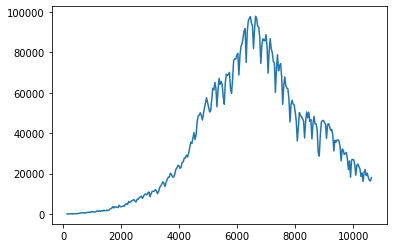

In [73]:
ind_save_df.daily_confirmed.plot()

Notice that the X axis does not have dates, and so it is difficult to understand what this plot is really trying to convey.

To address this issue, we can use the date column as the index of the data frame

In [72]:
ind_save_df.head(10)

,date,total_confirmed,total_recovered,total_deceased,tested,daily_confirmed,daily_recovered,daily_deceased,active
131,2020-03-13,91,3,1,6500.0,10.0,0.0,1.0,87
146,2020-03-14,102,3,1,6500.0,11.0,0.0,0.0,95
161,2020-03-15,112,3,1,6500.0,10.0,0.0,0.0,105
178,2020-03-16,126,3,1,6500.0,14.0,0.0,0.0,119
196,2020-03-17,146,3,1,6500.0,20.0,0.0,0.0,139
215,2020-03-18,171,3,1,13125.0,25.0,0.0,0.0,164
237,2020-03-19,198,3,1,14175.0,27.0,0.0,0.0,191
260,2020-03-20,256,4,1,15404.0,58.0,1.0,0.0,248
283,2020-03-21,334,4,1,16911.0,78.0,0.0,0.0,326
307,2020-03-22,403,4,1,18127.0,69.0,0.0,0.0,395


In [74]:
ind_save_df.set_index('date', inplace = True)

In [75]:
ind_save_df

,total_confirmed,total_recovered,total_deceased,tested,daily_confirmed,daily_recovered,daily_deceased,active
date,,,,,,,,
2020-03-13,91,3,1,6500.0,10.0,0.0,1.0,87
2020-03-14,102,3,1,6500.0,11.0,0.0,0.0,95
2020-03-15,112,3,1,6500.0,10.0,0.0,0.0,105
2020-03-16,126,3,1,6500.0,14.0,0.0,0.0,119
2020-03-17,146,3,1,6500.0,20.0,0.0,0.0,139
...,...,...,...,...,...,...,...,...
2021-01-01,10306469,9905570,149255,173941958.0,20159.0,23838.0,237.0,247427
2021-01-02,10324613,9926473,149471,174900083.0,18144.0,20903.0,216.0,244436
2021-01-03,10341291,9946131,149686,175636061.0,16678.0,19658.0,215.0,241228


The index of a data frame does not have to be a numeric. We can use date as an index and get data for a specific date using the '.loc'

In [76]:
ind_save_df.loc['2021-01-01']  # View data for 1st January 2021

total_confirmed     10306469.0
total_recovered      9905570.0
total_deceased        149255.0
tested             173941958.0
daily_confirmed        20159.0
daily_recovered        23838.0
daily_deceased           237.0
active                247427.0
Name: 2021-01-01 00:00:00, dtype: float64

Let's plot daily confirmed and deceased cases

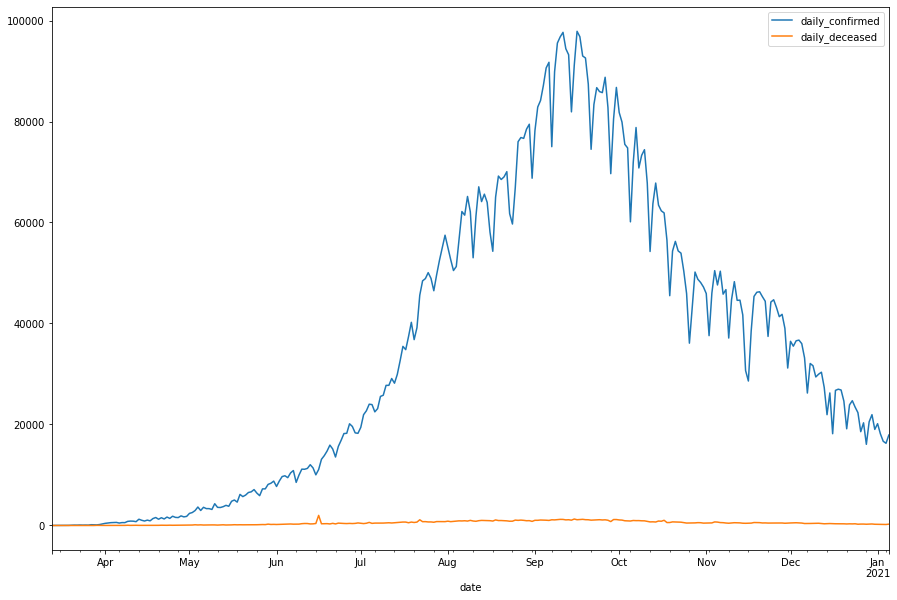

In [100]:
ind_save_df.daily_confirmed.plot(figsize=(15,10), legend=True)
ind_save_df.daily_deceased.plot(figsize=(15,10), legend=True)

Let's plot daily recovered cases

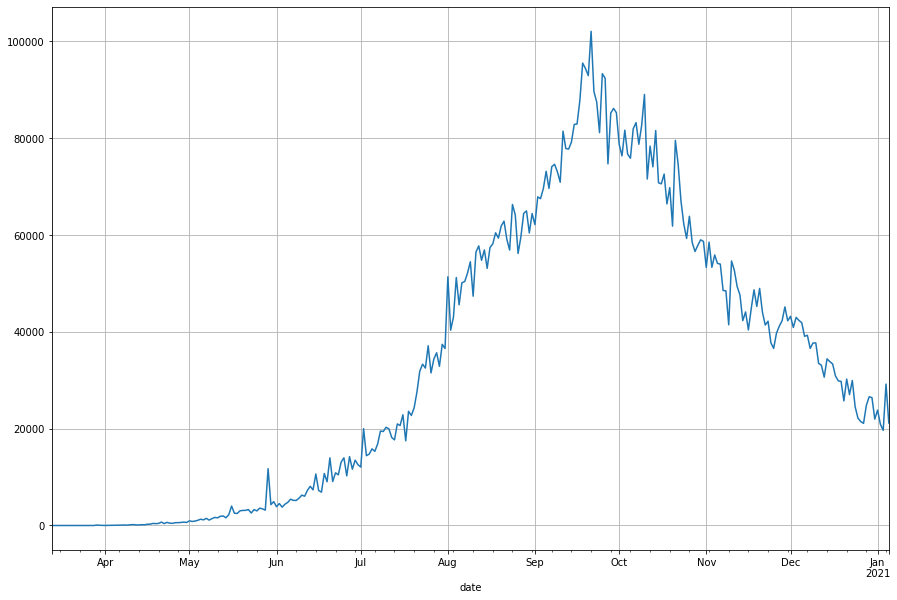

In [94]:
ind_save_df.daily_recovered.plot(figsize=(15,10), grid=True)

Let's compute the daily fatality rate and store the values in a new column 'cfr'

In [81]:
ind_save_df['cfr'] = (ind_save_df['daily_deceased'] / ind_save_df['daily_confirmed'] * 100)
ind_save_df.tail()

,total_confirmed,total_recovered,total_deceased,tested,daily_confirmed,daily_recovered,daily_deceased,active,cfr
date,,,,,,,,,
2021-01-01,10306469,9905570,149255,173941958.0,20159.0,23838.0,237.0,247427,1.175654
2021-01-02,10324613,9926473,149471,174900083.0,18144.0,20903.0,216.0,244436,1.190476
2021-01-03,10341291,9946131,149686,175636061.0,16678.0,19658.0,215.0,241228,1.289123
2021-01-04,10357569,9975340,149886,176532297.0,16278.0,29209.0,200.0,228088,1.228652
2021-01-05,10375478,9996501,150151,176532297.0,17909.0,21161.0,265.0,224557,1.479703


Now let's plot the cfr

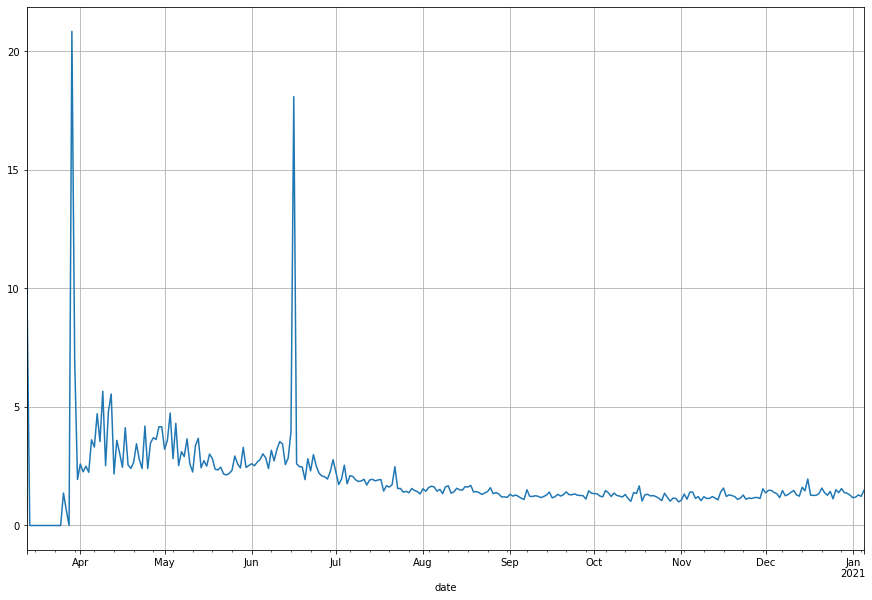

In [95]:
ind_save_df.cfr.plot(figsize=(15,10), grid=True)

Let's look at month-wise numbers for confirmed cases

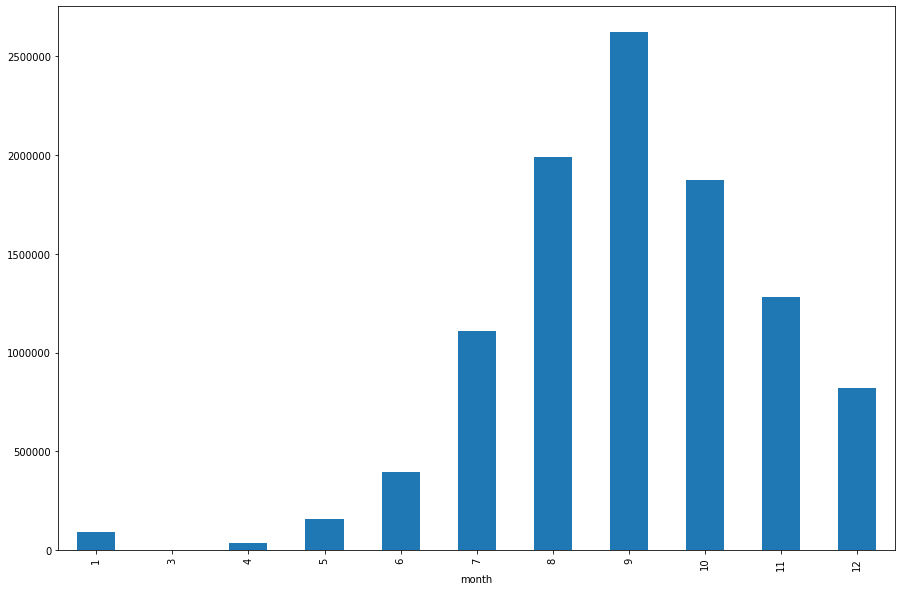

In [98]:
covid_ind_month_df.daily_confirmed.plot(figsize=(15,10), kind='bar')

And finally, let's visually compare the daily confirmed and daily recovered cases

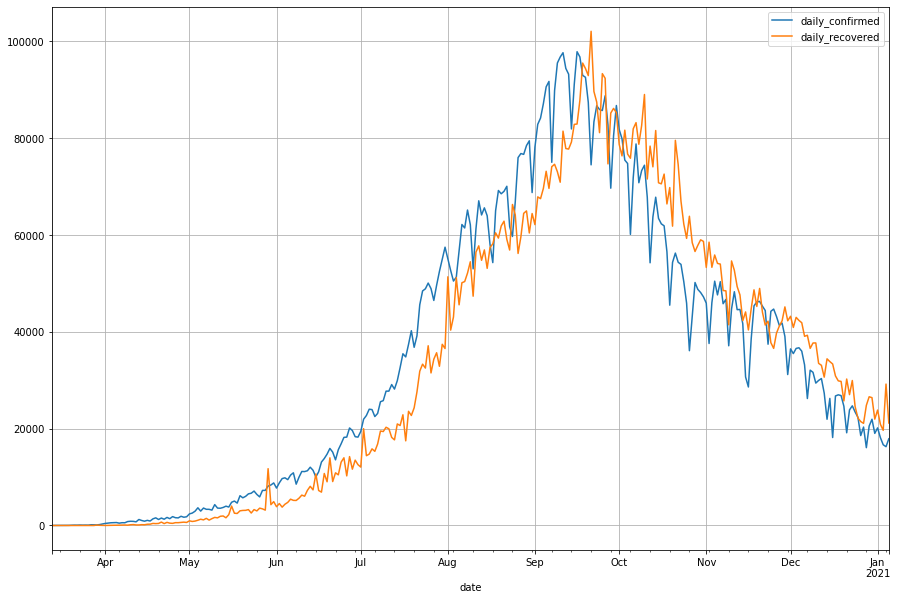

In [99]:
ind_save_df.daily_confirmed.plot(figsize=(15,10), grid=True, legend=True)
ind_save_df.daily_recovered.plot(figsize=(15,10), grid=True, legend=True)